> # Day1 - Linear Regression
***

     1- Import Library and make simple Data

     2- Compute Parameters

# Library

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# simple data

In [2]:
print(np.pi)

3.141592653589793


In [3]:
np.random.seed(0)
plt.figure()

# true data
N = 100

# linspace = 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.
# 시작, 끝(포함), 갯수
# reshape = 기존 데이터는 유지하고 차원과 형상을 바꿈.
# ex) 3개의 행과 4개의 열로 구성된 배열로 재설정하고 싶으면 reshape(3, 4)
# reshape(N,1) = 40개 행, 1개 열

# x 값은 -파이/2~+파이/2 이고
# y 값은 -1~1 사이의 값
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
X[:5]

array([[-3.14159265],
       [-3.07812614],
       [-3.01465962],
       [-2.9511931 ],
       [-2.88772658]])

<Figure size 432x288 with 0 Axes>

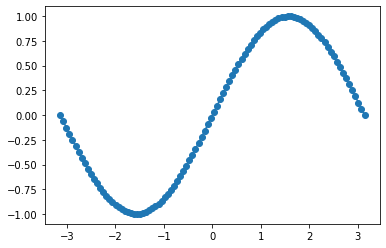

In [4]:
# plot 그리기

y = np.sin(X)
plt.plot(X, y)
plt.scatter(X, y)
plt.show()

#### rand 명령은 0과 1사이의 난수를 발생시키는 명령

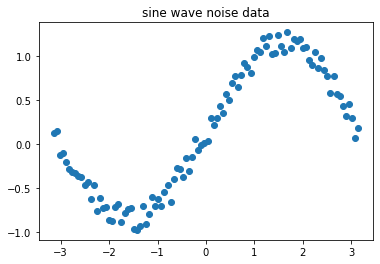

In [5]:
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X, y)
plt.title('sine wave noise data')
plt.show()

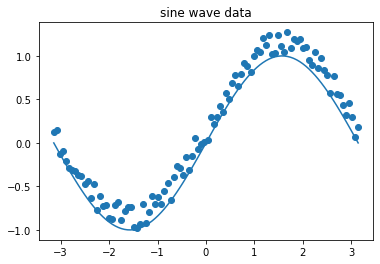

In [6]:
y = np.sin(X)
plt.plot(X, y)

# add noise
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

> ### Make feature for Linear regression
***

     1- 주어진 task 에 대해 linear regression 식을 구해본 후

     2- phi of x 를 구해주도록 한다
     


$$ {y_{1} = w_{0}*{\phi}_{0}(x_{1}) + w_{1}*{\phi}_{1}(x_{1})} $$<br>
$$ {{\phi_{k}}(x_{i}) = x_{i}^k} $$<br>
$$ {y_{1} = w_{0}*1 + w_{1}*x_{1}^1} $$

1. n_feature = 2 는 임의로 설정 가능하다
2. 선형 회귀식 모델을 2차라고 설정

In [7]:
n_feature = 2

# np.ones = 1 로 phi of 
# X.shape = (100,1) 이므로 40개로 구성

# 배열 x에 대해서 x.reshape(-1, 정수) 를 해주면 '열(column)' 차원의 '정수'에 따라서
# 배열 x의 원소가 빠짐없이 배치될 수 있도록 재배치
# X.shape[0] = 100
PHI_one = np.ones(X.shape[0]).reshape(-1, 1)
print(PHI_one.shape)

(100, 1)


In [8]:
X

array([[-3.14159265],
       [-3.07812614],
       [-3.01465962],
       [-2.9511931 ],
       [-2.88772658],
       [-2.82426006],
       [-2.76079354],
       [-2.69732703],
       [-2.63386051],
       [-2.57039399],
       [-2.50692747],
       [-2.44346095],
       [-2.37999443],
       [-2.31652792],
       [-2.2530614 ],
       [-2.18959488],
       [-2.12612836],
       [-2.06266184],
       [-1.99919533],
       [-1.93572881],
       [-1.87226229],
       [-1.80879577],
       [-1.74532925],
       [-1.68186273],
       [-1.61839622],
       [-1.5549297 ],
       [-1.49146318],
       [-1.42799666],
       [-1.36453014],
       [-1.30106362],
       [-1.23759711],
       [-1.17413059],
       [-1.11066407],
       [-1.04719755],
       [-0.98373103],
       [-0.92026451],
       [-0.856798  ],
       [-0.79333148],
       [-0.72986496],
       [-0.66639844],
       [-0.60293192],
       [-0.53946541],
       [-0.47599889],
       [-0.41253237],
       [-0.34906585],
       [-0

In [9]:
for i in range(1, n_feature):
    PHI = np.concatenate((PHI_one, np.power(X, i)), axis=1) # axis=1 -> 가로로 붙인다 (axis=0 이면 세로로 길게)
print('PHI.shape: ', PHI.shape)
print('PHI[:3] \n', PHI[:3])

PHI.shape:  (100, 2)
PHI[:3] 
 [[ 1.         -3.14159265]
 [ 1.         -3.07812614]
 [ 1.         -3.01465962]]


$$\begin{bmatrix} {\phi}_{0}(x_{0}) & {\phi}_{1}(x_{0}) \\ {\phi}_{0}(x_{1}) & {\phi}_{1}(x_{1}) \\ {\phi}_{0}(x_{2}) & {\phi}_{1}(x_{2}) \end{bmatrix}$$
<br>
<h5><center>즉, 아래와 같이 나타낼 수 있다.</center></h5>
<br>
$$\begin{bmatrix} 1. & -3.14159265 \\ 1. & -3.07812614 \\ 1. &  -3.01465962 \end{bmatrix}$$

In [10]:
# shuffle data
np.random.seed(10)

# N은 40이므로 1~40까지의 수를 섞어준다 (permutation(N))
idx = np.random.permutation(N)

shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_PHI[:3])
print(shuffle_y[:3])

# x 값은 -파이/2~+파이/2 이고
# y 값은 -1~1 사이의 값

[[-1.93572881]
 [-2.2530614 ]
 [-0.41253237]]
[[ 1.         -1.93572881]
 [ 1.         -2.2530614 ]
 [ 1.         -0.41253237]]
[[-0.87471741]
 [-0.76793019]
 [-0.16414674]]


# Split train / test dataset

In [11]:
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

PHI_train[:5]

array([[ 1.        , -1.93572881],
       [ 1.        , -2.2530614 ],
       [ 1.        , -0.41253237],
       [ 1.        , -0.79333148],
       [ 1.        ,  1.04719755]])

In [12]:
# test data
X_test = shuffle_X[n:]
PHI_test = shuffle_PHI[n:]
y_test = shuffle_y[n:]

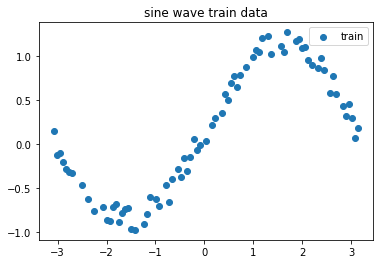

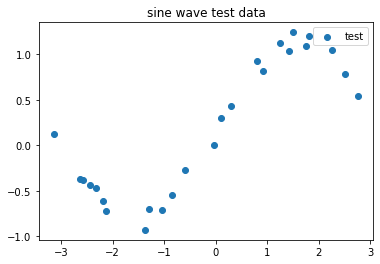

In [13]:
# plot
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

# Linear Regression
## method 1: compute W and b with numpy

In [14]:
PHI_train.shape

(75, 2)

In [15]:
# compute W_ with PHI_train.
# np.linalg.inv = 역행렬 구하는 함수\
# @ = 행렬 곱
W = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
W_formula = W
#shape = (2 x 75) * (75 x 2) * (2 x 75) * (75 x 1) => (2 x 1)

print('W.shape: ', W.shape)
print('W \n', W)
print("\n")
print('w0 =',W[0])
print('w1 =',W[1])

W.shape:  (2, 1)
W 
 [[0.11366004]
 [0.29426972]]


w0 = [0.11366004]
w1 = [0.29426972]


### @ 의 역할?

In [16]:
print(np.array([[1,2],[3,4]]))
print(np.array([[10],[20]]))
print("\n두개의 행렬을 곱해주면\n")
print(np.array([[1,2],[3,4]]) @ np.array([[10],[20]]))

[[1 2]
 [3 4]]
[[10]
 [20]]

두개의 행렬을 곱해주면

[[ 50]
 [110]]


### 다시 본래 코드로 돌아와서

In [17]:
PHI_train[:5]

array([[ 1.        , -1.93572881],
       [ 1.        , -2.2530614 ],
       [ 1.        , -0.41253237],
       [ 1.        , -0.79333148],
       [ 1.        ,  1.04719755]])

### Train data 로 Plot

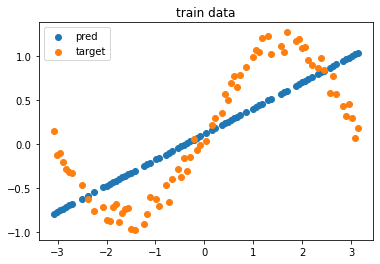

In [18]:
plt.figure()
plt.scatter(X_train, PHI_train @ W, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

### Test data 로 plot

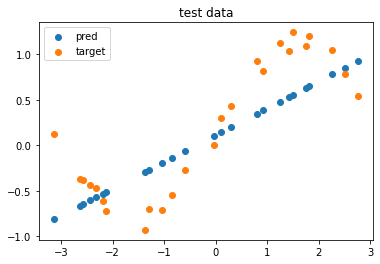

In [19]:
plt.figure()
plt.scatter(X_test, PHI_test @ W, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

### Train, Test data 로 plot

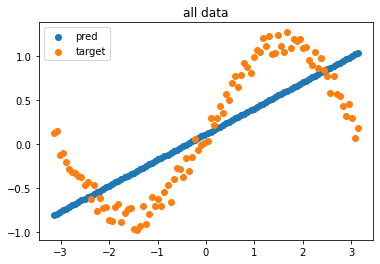

In [20]:
X_all = shuffle_X[:]
PHI_all = shuffle_PHI[:]
y_all = shuffle_y[:]

plt.figure()
plt.scatter(X_all, PHI_all @ W, label='pred')
plt.scatter(X_all, y_all, label='target')
plt.legend()
plt.title('all data')
plt.show()

# Linear Regression
## method 2: compute W and b with sklearn library

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [0.11366004]
w1:  [[0.29426972]]


## ☆교재의 식과 비교했을때 완벽하게 똑같은 것을 알 수 있다.☆
##### 단, 중요한 것은 수식을 따라 그대로 계산했을 때는 phi 를 따로 만들어주었지만, library 를 쓸 때는 그럴 필요가 없다는 것
PHI 를 따로 만들어서 direct calculation 을 하느냐 <br>
x 를 그대로 넣느냐

In [22]:
W_formula

array([[0.11366004],
       [0.29426972]])

### Prediction 은 .predict 를 이용

In [23]:
Pred = reg.predict(X_train)

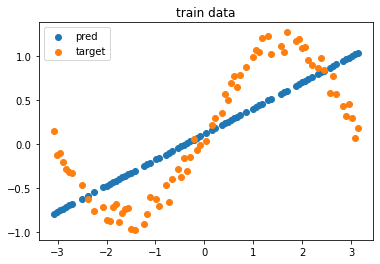

In [24]:
plt.figure()
plt.scatter(X_train, Pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

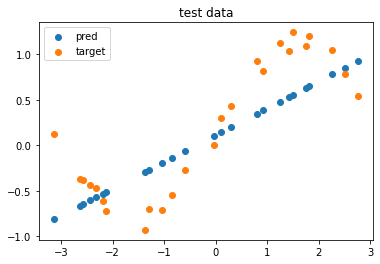

In [25]:
plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Another Dataset (Practice)

noise data 를 가진 y 값을 지정해준다

In [26]:
# y = 2x + 5
X = 3 * np.random.rand(100,1)
y = 2 * X + 5

# add_noise
y_noise = y + np.random.rand(100, 1) # noise data 를 가진 y 값

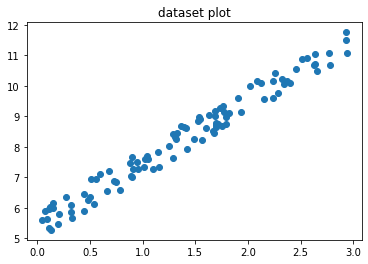

In [27]:
plt.scatter(X, y_noise)
plt.title('dataset plot')
plt.show()

In [28]:
PHI = np.ones(X.shape[0]).reshape(-1,1)

# phi of x 추가
PHI = np.concatenate((PHI, X),axis=1)

print('PHI\n',PHI[:3])

PHI
 [[1.         2.32149089]
 [1.         0.11987763]
 [1.         1.28847654]]


### 1. Formula 를 이용

In [29]:
# calculate W
W = np.linalg.inv(PHI.T @ PHI) @ PHI.T @ y_noise

print('[b,\n w] = W')
print('W.shape: ', W.shape)
print('w0 =',W[0])
print('w1 =',W[1])

# y 절편 = w0 = 5.46
# slope = w1 = 2.07

[b,
 w] = W
W.shape:  (2, 1)
w0 = [5.46443632]
w1 = [2.027286]


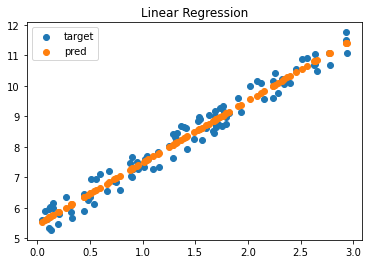

In [30]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, PHI @ W, label='pred')
plt.legend()
plt.title('Linear Regression')
plt.show()

### 2. Library 이용

In [31]:
reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [5.46443632]
w1:  [[2.027286]]


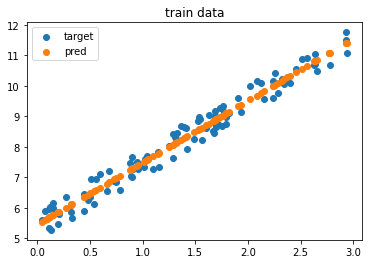

In [32]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')
plt.legend()
plt.title('train data')
plt.show()

# Polynomial Regression

$$ {y = x^2 + 3x + 5} $$

In [33]:
np.random.seed(5)

N = 100
# 기존 x 범위는 0~6 사이였으나 -3 이 있으므로 -3~3 이 범위로 바뀌게 된다.
X = 6 * np.random.rand(N,1)-3 
y = X**2 + 3*X +5

noise 추가

In [34]:
y_noise = y + 3*np.random.rand(N, 1)

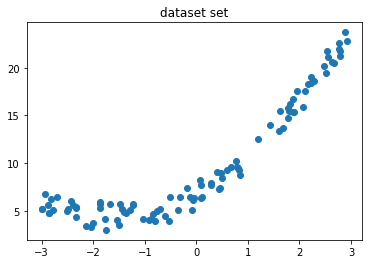

In [35]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [9.86809285]
w1:  [[2.97610592]]


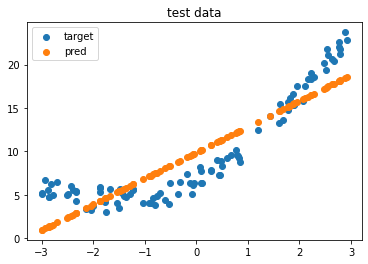

In [37]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')

plt.legend()
plt.title('test data')
plt.show()

### 1차 그래프가 아닌 2차원 혹은 그 이상을 사용해야 올바른 예측이 가능

Feature 를 추가 할 때는 PolynomialFeatures 를 사용하자<br>
제곱, 세제곱 등의 계산이 가능

In [38]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree = 2, include_bias = False)
new_feature = polynomial.fit_transform(X)

print("기존의 x[0]:",X[0])
print("Feature가 추가된 x[0]:", new_feature[0])

기존의 x[0]: [-1.66804097]
Feature가 추가된 x[0]: [-1.66804097  2.78236069]


### Feature 를 추가한 상태에서 LinearRegression 을 다시 사용

In [39]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [6.82439098]
w1:  [[3.02103818 0.92278965]]


$$ {y = x^2 + 3x + 5} $$
$$ {y = 0.92x^2 + 3.02x + 6.82} $$

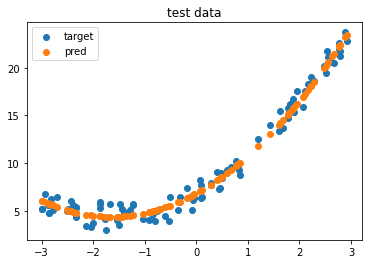

In [40]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature), label='pred')

plt.legend()
plt.title('test data')
plt.show()

# Practice1

## Polynomial Regression

x 의 범위는 -2~2 <br>
$$ {y = 3x^3 + 2x^2 + 7x + 5} $$

In [41]:
np.random.seed(10)

N = 100
X = 4 * np.random.rand(N,1)-2
y = 3*X**3 + 2*X**2 + 7*X + 5

y_noise = y + 10*np.random.rand(N, 1)

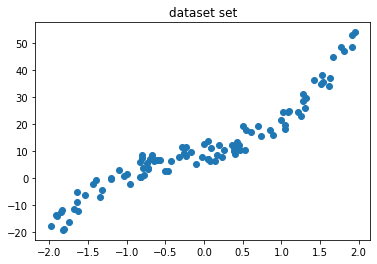

In [42]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [43]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
new_feature_three = polynomial.fit_transform(X)

print("기존의 x[0]:",X[0])
print("Feature가 추가된 x[0]:", new_feature_three[0])

기존의 x[0]: [1.08528257]
Feature가 추가된 x[0]: [1.08528257 1.17783826 1.27828734]


In [44]:
reg = LinearRegression()
reg.fit(new_feature_three, y_noise)

print('b: ', reg.intercept_)
print('W: ', reg.coef_)

b:  [9.18157997]
W:  [[6.35064075 2.3300474  3.20666863]]


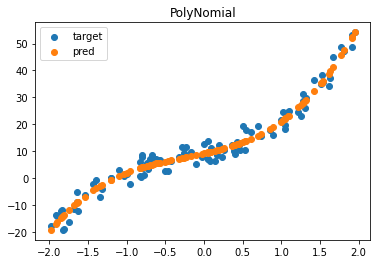

In [45]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature_three), label='pred')

plt.legend()
plt.title('PolyNomial')
plt.show()

$$ {y = 3x^3 + 2x^2 + 7x + 1} $$
$$ {y = 3.20x^3 + 2.33x^2 + 6.35x + 9.18} $$

# Practice 2

### 앞서 했던 sin 함수를 1차 그래프가 아닌 다차원 그래프로 정확한 예측을 해보자

In [46]:
N = 100

X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)

y = np.sin(X)
y += 0.3*np.random.rand(N, 1)

In [47]:
n_feature = 4

PHI = np.ones(X.shape[0]).reshape(-1, 1)
print(PHI.shape)

for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1) # axis=1 -> 가로로 붙인다 (axis=0 이면 세로로 길게)
print('PHI.shape: ', PHI.shape)
print('PHI[:3] \n', PHI[:3])

(100, 1)
PHI.shape:  (100, 4)
PHI[:3] 
 [[  1.          -3.14159265   9.8696044  -31.00627668]
 [  1.          -3.07812614   9.47486051 -29.16481575]
 [  1.          -3.01465962   9.08817261 -27.39774695]]


In [48]:
np.concatenate((PHI, np.power(X, 1)), axis=1).shape

(100, 5)

In [49]:
# shuffle data
idx = np.random.permutation(N)

shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_PHI[:3])
print(shuffle_y[:3])

[[-1.87226229]
 [ 1.17413059]
 [-0.47599889]]
[[ 1.         -1.87226229  3.50536608 -6.56296471]
 [ 1.          1.17413059  1.37858264  1.61863604]
 [ 1.         -0.47599889  0.22657494 -0.10784942]]
[[-0.87765961]
 [ 1.179949  ]
 [-0.22024455]]


# Split train / test dataset

In [50]:
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

PHI_train[:5]

array([[ 1.        , -1.87226229,  3.50536608, -6.56296471],
       [ 1.        ,  1.17413059,  1.37858264,  1.61863604],
       [ 1.        , -0.47599889,  0.22657494, -0.10784942],
       [ 1.        ,  2.06266184,  4.25457388,  8.7757472 ],
       [ 1.        , -1.61839622,  2.61920631, -4.23891358]])

In [51]:
# test data
X_test = shuffle_X[n:]
PHI_test = shuffle_PHI[n:]
y_test = shuffle_y[n:]

In [52]:
PHI_train.shape

(75, 4)

In [53]:
# compute W_ with PHI_train.
# np.linalg.inv = 역행렬 구하는 함수\
# @ = 행렬 곱
W = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
W_formula = W
#shape = (4 x 75) * (75 x 4) * (4 x 75) * (75 x 1) => (2 x 1)

print('W.shape: ', W.shape)
print('W \n', W)
print("\n")
print('w0 =',W[0])
print('w1 =',W[1])
print('w2 =',W[2])
print('w3 =',W[3])

W.shape:  (4, 1)
W 
 [[ 1.47824779e-01]
 [ 8.60049596e-01]
 [ 3.73509511e-04]
 [-9.41293398e-02]]


w0 = [0.14782478]
w1 = [0.8600496]
w2 = [0.00037351]
w3 = [-0.09412934]


In [54]:
PHI_train[:5]

array([[ 1.        , -1.87226229,  3.50536608, -6.56296471],
       [ 1.        ,  1.17413059,  1.37858264,  1.61863604],
       [ 1.        , -0.47599889,  0.22657494, -0.10784942],
       [ 1.        ,  2.06266184,  4.25457388,  8.7757472 ],
       [ 1.        , -1.61839622,  2.61920631, -4.23891358]])

### Train data 로 Plot

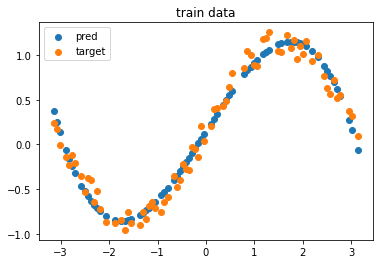

In [55]:
plt.figure()
plt.scatter(X_train, PHI_train @ W, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

### Test data 로 plot

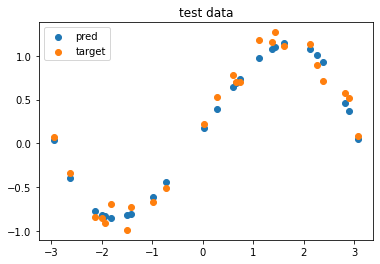

In [56]:
plt.figure()
plt.scatter(X_test, PHI_test @ W, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

### Train, Test data 로 plot

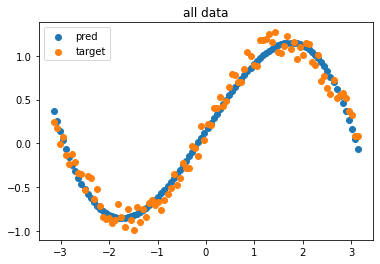

In [57]:
X_all = shuffle_X[:]
PHI_all = shuffle_PHI[:]
y_all = shuffle_y[:]

plt.figure()
plt.scatter(X_all, PHI_all @ W, label='pred')
plt.scatter(X_all, y_all, label='target')
plt.legend()
plt.title('all data')
plt.show()